# Machine Learning Lab 1

## Assignment 2 (Deadline : 4/12/2022 11:59PM)

Total Points : 100

Your answers must be entered in LMS by midnight of the day it is due. 

If the question requires a textual response, you can create a PDF and upload that. 

The PDF might be generated from MS-WORD, LATEX, the image of a hand- written response, or using any other mechanism. 

Code must be uploaded and may require demonstration to the TA. 

Numbers in the parentheses indicate points allocated to the question. 

**Naming Convention**: FirstName_LastName_Lab2_TLP23.ipynb

# Question 1 (50 points)

## 1. Read the data into a numpy array

In [ ]:
#packages

In [1]:
# Read data from file: 'data.csv'. 
# Note that the first row has the number of inputs and number of outputs specified.
# For your reference: you can use "np.loadtxt".
import pandas as pd
import numpy as np
from prettytable import PrettyTable
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import sklearn
#from sklearn.cross_validation import train_test_split
data =pd.read_csv('data.csv')
data.reset_index(inplace=True)
data.rename(columns={'index':'x1','2':'x2','1':'y'}, inplace = True)

## 2. Plot and explore the data to get a better understanding

In [2]:
# EDA
data.head()

,x1,x2,y
0,51.87,79.72,1249.99
1,-30.66,-15.64,-516.61
2,-57.57,94.22,312.09
3,-122.10,5.15,-1544.90
4,-53.45,41.87,-201.57


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      3000 non-null   float64
 1   x2      3000 non-null   float64
 2   y       3000 non-null   float64
dtypes: float64(3)
memory usage: 70.4 KB


In [4]:
data.describe()

,x1,x2,y
count,3000.000000,3000.00000,3000.000000
mean,-18.483293,31.24422,-11.450140
std,34.398479,42.99015,662.873355
min,-140.710000,-132.18000,-2325.790000
25%,-40.392500,3.38250,-446.140000
50%,-18.485000,31.34500,-17.680000
75%,4.125000,60.59000,429.782500
max,93.930000,189.99000,2198.490000


In [5]:
data['x1']

0        51.87
1       -30.66
2       -57.57
3      -122.10
4       -53.45
         ...  
2995     24.70
2996     31.81
2997    -18.60
2998    -38.31
2999    -38.33
Name: x1, Length: 3000, dtype: float64

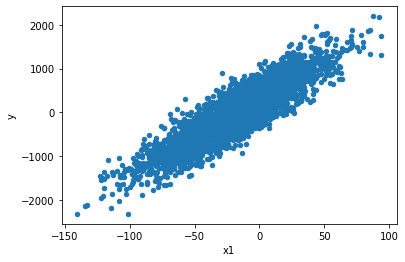

In [6]:
data.plot('x1','y',kind = 'scatter')

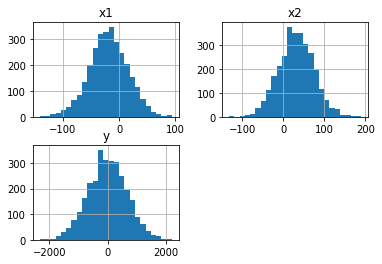

In [7]:
data.hist(bins=25)
plt.show()

## 3. Prepare the data for modelling

In [8]:
# Separate the data: input and output.
X = data[['x1','x2']]
y = data['y']

#adding weights column w0

trainS = X.shape[0]
const = pd.DataFrame(np.ones(trainS))
X = pd.concat([const,X], axis = 'columns')

In [9]:
X

,0,x1,x2
0,1.0,51.87,79.72
1,1.0,-30.66,-15.64
2,1.0,-57.57,94.22
3,1.0,-122.10,5.15
4,1.0,-53.45,41.87
...,...,...,...
2995,1.0,24.70,189.14
2996,1.0,31.81,-25.28
2997,1.0,-18.60,32.61
2998,1.0,-38.31,77.81


In [10]:
data.corr()['y']

x1    0.890029
x2    0.786392
y     1.000000
Name: y, dtype: float64

In [11]:
# Perform a train-val-test split of 60-20-20.
# Use "random_state=42".
# For your reference: you can use "train_test_split" from sklearn twice to perform this. 

from sklearn.model_selection import train_test_split

X_split, X_test, y_split, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_split, y_split, test_size=0.25, random_state=42)

 * From your understanding of the dataset, is stratified sampling necessary in this case? Why / Why not?


##### Stratified sampling in not necessary in this case. From the correlation of the features with the output, we observe that both the features are closely related to the output and we cannot distinctly divide the output based on one single feature or none of the features affect the output more significantly than the other.

## 4. Modelling

### 4.1 Linear Regression

In [12]:
# Implement Linear Regression.
# Use both train and val data for training purpose.
# Make preditions on both training(train+val) and test data.
from sklearn.linear_model import LinearRegression

lm = LinearRegression().fit(X_split, y_split)
train_prediction = lm.predict(X_split)
test_prediction = lm.predict(X_test)
train_score = lm.score(X_split, y_split)
test_score = lm.score(X_test, y_test)
test_score

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklea

0.951393653409172

### 4.2 Ridge Reegression

In [13]:
# Implement Ridge Regression.
# Perform cross validation to find a good value for your hyper-parameter.
# After choosing a good value for your hyper-parameter, use both train and val data for final training purpose of your model.
# Make preditions on both training(train+val) and test data.
from sklearn.linear_model import Ridge, RidgeCV

alphas = np.linspace(0.1, 500, 1000)
ridge = RidgeCV(alphas=alphas).fit(X_split, y_split)
train_score = ridge.score(X_val, y_val)
train_ridge_prediction = ridge.predict(X_split)
test_ridge_prediction = ridge.predict(X_test)
print(ridge.alpha_)
ridge.coef_

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


344.87587587587586


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


array([ 0.        , 12.72506727,  7.08385895])

### 4.3 Lasso Regression

In [14]:
# Implement Lasso Regression.
# Perform cross validation to find a good value for your hyper-parameter.
# After choosing a good value for your hyper-parameter, use both train and val data for final training purpose of your model.
# Make preditions on both training(train+val) and test data.
from sklearn.linear_model import Lasso, LassoCV

alphas = np.linspace(0.001, 1000,10000)
lasso = LassoCV(alphas=alphas).fit(X_split, np.array(y_split))
train_score = ridge.score(X_split, y_split)
train_lasso_prediction = lasso.predict(X_split)
test_lasso_prediction = lasso.predict(X_test)
print(lasso.alpha_)
lasso.coef_

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.6010594059405941


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


array([ 0.        , 12.72658615,  7.08348079])

### 4.4 ElasticNet Regression

In [15]:
# Implement ElasticNet Regression.
# Perform cross validation to find a good value for your hyper-parameters.
# After choosing a good value for your hyper-parameter, use both train and val data for final training purpose of your model.
# Make preditions on both training(train+val) and test data.

from sklearn.linear_model import ElasticNetCV

alphas = np.linspace(0.001, 100,1000)
l1_ratios = np.linspace(0.01, 1,10)
cv_model = ElasticNetCV(l1_ratio=l1_ratios, alphas=alphas)
cv_model.fit(X_split, y_split)
train_elasticNetCV_prediction = cv_model.predict(X_split)
test_elasticNetCV_prediction = cv_model.predict(X_test)
print('Optimal alpha: %.8f'%cv_model.alpha_)
print('Optimal l1_ratio: %.3f'%cv_model.l1_ratio_)
print('Number of iterations %d'%cv_model.n_iter_)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Optimal alpha: 0.60159459
Optimal l1_ratio: 1.000
Number of iterations 8


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


## 5. Analysis

In [16]:
# Write down the actual value along with the preditions from all the regression models, for the first 10 points in test data.
# single table
analysis = pd.DataFrame()
analysis['Test Output'] = y_test
analysis['LinearRegression Output'] = test_prediction
analysis['Ridge Output'] = test_ridge_prediction
analysis['Lasso Output'] = test_lasso_prediction
analysis['Elastic reg out'] = test_elasticNetCV_prediction
analysis.head(10)

,Test Output,LinearRegression Output,Ridge Output,Lasso Output,Elastic reg out
1801,66.12,61.235630,61.233656,61.233406,61.233404
1190,-572.89,-576.474002,-576.481071,-576.452311,-576.452300
1817,-94.71,-112.489283,-112.494007,-112.484719,-112.484717
251,-306.84,-413.460170,-413.412918,-413.455248,-413.455236
2505,580.10,602.521612,602.433857,602.517197,602.517179
1117,-34.05,-19.808152,-19.791245,-19.811262,-19.811261
1411,-81.37,-172.968197,-172.934813,-172.969120,-172.969114
2113,552.60,601.278257,601.216623,601.268637,601.268621
408,-24.39,-42.406417,-42.445997,-42.397364,-42.397366
2579,538.47,558.283905,558.244597,558.271341,558.271326


In [17]:
# Find both RMSE and MAE for all the regression models on both training(train+val) and testing data.

print("***********************************************************************************")
print('RMSE for Linear Regression for Train + Valid data: ',np.sqrt(mean_squared_error(y_split, train_prediction)))
print('RMSE for Linear Regression for Test data: ',np.sqrt(mean_squared_error(y_test,test_prediction)))
print('MAE for Linear Regression for Train+Valid data: ',mean_absolute_error(y_split,train_prediction))
print('MAE for Linear Regression for Test data: ',mean_absolute_error(y_test,test_prediction))
print("***********************************************************************************")
print('RMSE for Ridge Regression for Train + Valid data: ',np.sqrt(mean_squared_error(y_split, train_ridge_prediction)))
print('RMSE for Ridge Regression for Test data: ',np.sqrt(mean_squared_error(y_test, test_lasso_prediction)))
print('MAE for Ridge Regression for Train + Valid data: ',mean_absolute_error(y_split, train_ridge_prediction))
print('MAE for Ridge Regression for Test data: ',mean_absolute_error(y_test, test_lasso_prediction))
print("***********************************************************************************")
print('RMSE for Lasso Regression for Train + Valid data: ',np.sqrt(mean_squared_error(y_split, train_lasso_prediction)))
print('RMSE for Lasso Regression for Test data: ',np.sqrt(mean_squared_error(y_test, test_lasso_prediction)))
print('MAE for Lasso Regression for Train + Valid data: ',mean_absolute_error(y_split, train_lasso_prediction))
print('MAE for Lasso Regression for Test data: ',mean_absolute_error(y_test, test_lasso_prediction))
print("***********************************************************************************")
print('RMSE for ElasticNet Regression for Train + Valid data: ',np.sqrt(mean_squared_error(y_split, train_elasticNetCV_prediction)))
print('RMSE for ElasticNet Regression for Test data: ',np.sqrt(mean_squared_error(y_test, test_elasticNetCV_prediction)))
print('MAE for ElasticNet Regression for Train + Valid data: ',mean_absolute_error(y_split, train_elasticNetCV_prediction))
print('MAE for ElasticNet Regression for Test data: ',mean_absolute_error(y_test, test_elasticNetCV_prediction))
print("***********************************************************************************")

***********************************************************************************
RMSE for Linear Regression for Train + Valid data:  151.58756422068186
RMSE for Linear Regression for Test data:  148.47388000962516
MAE for Linear Regression for Train+Valid data:  120.77989321708048
MAE for Linear Regression for Test data:  118.72866511674283
***********************************************************************************
RMSE for Ridge Regression for Train + Valid data:  151.58757379663814
RMSE for Ridge Regression for Test data:  148.4732299322618
MAE for Ridge Regression for Train + Valid data:  120.7807375001705
MAE for Ridge Regression for Test data:  118.72796609932276
***********************************************************************************
RMSE for Lasso Regression for Train + Valid data:  151.5875649108729
RMSE for Lasso Regression for Test data:  148.4732299322618
MAE for Lasso Regression for Train + Valid data:  120.78007761950833
MAE for Lasso Regression for T

In [18]:
x = PrettyTable()
x.field_names = ["Model","alpha","MAE","RMSE","Data Type"]
x.add_row(["Linear Regression", ridge.alpha_, mean_absolute_error(y_split,train_prediction), np.sqrt(mean_squared_error(y_split, train_prediction)),"Train + Valid data"])
x.add_row(["Linear Regression", ridge.alpha_, mean_absolute_error(y_test,test_prediction), np.sqrt(mean_squared_error(y_test,test_prediction)),"Test"])
#x.add_row(["Ridge Regression", ridge.alpha_, mean_absolute_error(y_split, train_ridge_prediction), np.sqrt(mean_squared_error(y_split, train_ridge_prediction)),"Train + Valid data"])
#x.add_row(["Ridge Regression", ridge.alpha_, mean_absolute_error(y_test, test_lasso_prediction)), np.sqrt(mean_squared_error(y_test, test_lasso_prediction)),"Test"])
#x.add_row(["Lasso Regression", ridge.alpha_, mean_absolute_error(y_split,train_prediction), np.sqrt(mean_squared_error(y_split, train_prediction)),"Train + Valid data"])
#x.add_row(["Lasso Regression", ridge.alpha_, mean_absolute_error(y_test,test_prediction), np.sqrt(mean_squared_error(y_test,test_prediction)),"Test"])

print(x)

+-------------------+--------------------+--------------------+--------------------+--------------------+
|       Model       |       alpha        |        MAE         |        RMSE        |     Data Type      |
+-------------------+--------------------+--------------------+--------------------+--------------------+
| Linear Regression | 344.87587587587586 | 120.77989321708048 | 151.58756422068186 | Train + Valid data |
| Linear Regression | 344.87587587587586 | 118.72866511674283 | 148.47388000962516 |        Test        |
+-------------------+--------------------+--------------------+--------------------+--------------------+


## 6. Final Observations
Write down your final conclusions and observations

From section 5(Analysis), we can see that RMSE and MAE are very similar and almost the same across all 4 models. Hence,we can say that the regularization does not have much effect on this model. Linear regression would be best in this scenario as their would be less processing required without any regularization. All the other methods with regularization and hyper parameter tuning are a bit of over kill and the complexity could have been avoided. Also, on calculating the coeffients of x1 and x2 obtained from the 4 models, they also come out to be close. 

# Question 2 (30 points)

Given the automobile dataset at https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv , 

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [24]:
df = pd.read_csv('automobileEDA.csv')

In [25]:
df.head() 

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


## 1. Load and examine the dataset

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
lm = LinearRegression()
lm 

LinearRegression()

In [30]:
X = df[['highway-mpg']]

In [32]:
Y = df['price']

### Fit and Train

In [33]:
lm.fit(X,Y)

LinearRegression()

## 2. Visualise/Plot the regression model

In [34]:
import seaborn as sns
%matplotlib inline 

(0.0, 48167.469577341675)

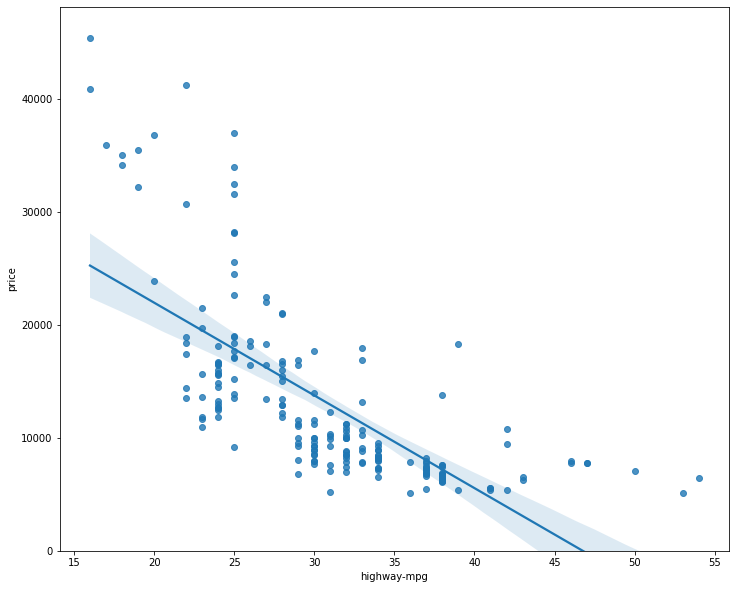

In [35]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,) 

-- Price is negatively correlated to highway-mpg.

-- The data points are scattered badly around the regression line.

-- A linear model is NOT the best fit.

## 3. Generate a Linear Regression equation

### Find y-intercept

In [36]:
lm.intercept_

38423.3058581574

### Find the gradient

In [37]:
lm.coef_

array([-821.73337832])

### Test predictions

In [38]:
Yhat=lm.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

## 4. Use a residual plot to inspect if LR fits the model

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


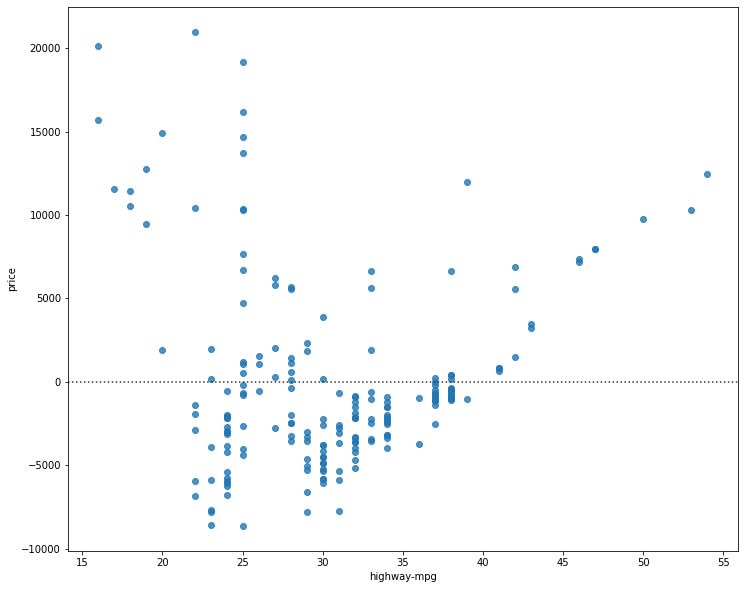

In [39]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['highway-mpg'], df['price'])
plt.show() 



*   What is a Residual? The difference between the observed value (y) and the predicted value
(Yhat).

*   If the points in a Residual Plot are randomly spread out around the x-axis, then a linear model is appropriate for the data. 

*   Because randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data. 

*   A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis. 



## 5. Use R2 and MSE to determine the accuracy of the LR fit 

In [40]:
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y)) 

The R-square is:  0.4965911884339176


In [41]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4]) 

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [42]:
from sklearn.metrics import mean_squared_error 

In [43]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse) 

The mean square error of price and predicted value is:  31635042.944639888


# Question 3 (20 points)

### In this assignment, you will experiment with a toy dataset – the Iris dataset.

## 1. Load the Iris dataset.

In [55]:
 # Import datasets library from sklearn and load the iris dataset

from sklearn import datasets
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import warnings
import pandas as pd
import matplotlib.pyplot as plt


warnings.filterwarnings("ignore")

iris=datasets.load_iris()

In [56]:
# Reading the Data and Target values to x and y
# Reading the target names to ynames

inputData=iris.data
target=iris.target
targetNames=iris.target_names

In [57]:
# Creating seperate lists with different columns for stratified sampling 

sepalLength=[]
sepalWidth=[]
petalLength=[]
petalWidth=[]
for row in inputData:
    sepalLength.append(row[0])
    sepalWidth.append(row[1])
    petalLength.append(row[2])
    petalWidth.append(row[2])

## 2. The Iris data has 3 classes. For the purpose of this assignment, you will modify it such that it has two classes – specifically, you will merge the “setosa” and “versicolor” classes.

In [58]:
# Filtering out the values with value 0 and 1 and encoding them as 1 , ie combining the classes
# Encoding Setosa and Versicolor as 0 and Virginica as 1
target[(target==0) | (target==1)]=0
target[target==2]=1

## 3. Construct a training set and a testing set using 80-20 split using random sampling.

In [59]:
# Creating an index to shuffle data and shuffling data using it
indexList=[i for i in range(0,inputData.shape[0])]
inputDistribution=(len(target[target==0])/len(target[target==1]))
trainDistribution=0
testDistribution=0

np.random.shuffle(indexList) # Shuffling the index. Used for splitting train and test data
splitLength=int(len(inputData)*0.8) # Finding the position to split
trainIndex=indexList[0:splitLength]  #Splitting the train data randomly:Creating the indices
testIndex=indexList[splitLength:] #Splitting the test data randomly; Creating the indices

#Splitting the data
X_train=inputData[trainIndex]
Y_train=target[trainIndex]
X_test=inputData[testIndex]
Y_test=target[testIndex]

#Finding the distribution of test and train datasets
trainDistribution=len(Y_train[Y_train==0])/len(Y_train[Y_train==1])
testDistribution=len(Y_test[Y_test==0])/len(Y_test[Y_test==1])
print(trainDistribution,testDistribution)

1.8571428571428572 2.75


Class0/Class1 ration in input data:  2.0
Class0/Class1 ration in train data:  1.8571428571428572
Class0/Class1 ration in train data:  2.75


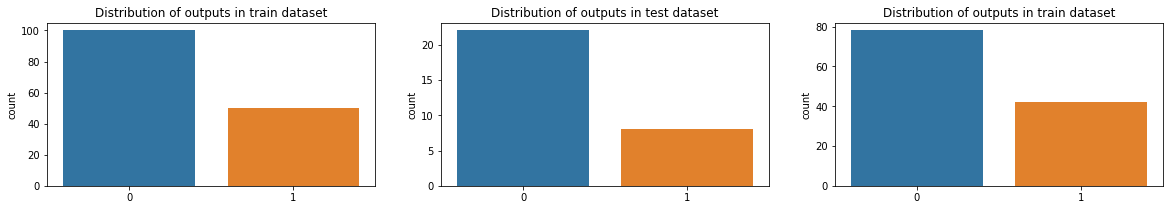

In [60]:
#Distribution of targets in train and test datasets
plt.figure(figsize=(20,3))

#Plotting the distribution countplots

plt.subplot(1,3,1)
plt.title('Distribution of outputs in train dataset')
sns.countplot(target)

plt.subplot(1,3,2)
plt.title('Distribution of outputs in test dataset')
sns.countplot(Y_test)

plt.subplot(1,3,3)
plt.title('Distribution of outputs in train dataset')
sns.countplot(Y_train)

# Finding the distribution of the two classes in main, train and test datasets

print('Class0/Class1 ration in input data: ',len(target[target==0])/len(target[target==1]))
print('Class0/Class1 ration in train data: ',len(Y_train[Y_train==0])/len(Y_train[Y_train==1]))
print('Class0/Class1 ration in train data: ',len(Y_test[Y_test==0])/len(Y_test[Y_test==1]))

## 4. Use Logistic Regression as a black box classifier and assess the performance.

In [63]:
def createConfusionMatrix(predicted,target):
    """ This function creates a confusion matrix by iterating through the predicted and target lists together using the zip function. 
    It compares elements from both the list elementwise and then checks if it is true positive, 
    false positive, true negative or false negative. """
    
    trueNegative=0
    truePositive=0
    falsePositive=0
    falseNegative=0
    for prediction,actual in zip(predicted,target):
        if (prediction==0) & (actual==0):
            trueNegative+=1
        elif (prediction==0) & (actual==1):
            falsePositive+=1
        elif (prediction==1) & (actual==0):
            falseNegative+=1
        elif (prediction==1) & (actual==1):
            truePositive+=1
    # Creating the confusion matrix
    confusionMatrix=[[truePositive,falseNegative],[falsePositive,trueNegative]]
    return confusionMatrix
            

In [64]:
def symmetricLossFunction(predicted,actual):
    """ Function to calculate the symmetric loss function. Here, the false negatives and false positives are penalised. 
    Hence this cannot be used to functions where we need to penalise false positive or true negative more"""
    
    loss=0
    if len(predicted)==len(actual):
        for i in range(len(predicted)):
            if predicted[i]!=actual[i]:
                loss+=1
    return loss

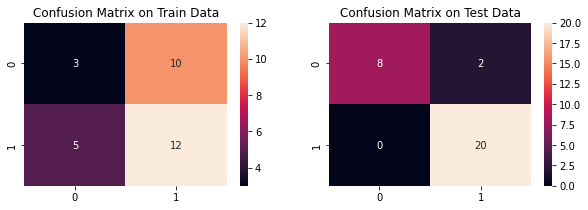

In [65]:
lr=LogisticRegression() # Creating a logistic regression object

# Applying Logistic Regression on the unbalanced Dataset
lr.fit(X_train,Y_train) # Fitting the object on train dataset to create the model
# Doing predictions on train and test datasets
Y_train_predicted=lr.predict(X_train)
Y_test_predicted=lr.predict(X_test)

# Plotting the confusion matrix using the sns heatmap for train and test data
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.title('Confusion Matrix on Train Data')
confusionTrain=createConfusionMatrix(Y_train_predicted,Y_test)
sns.heatmap(confusionTrain,annot=True)

plt.subplot(1,2,2)
plt.title('Confusion Matrix on Test Data')
confusionTrain=createConfusionMatrix(Y_test_predicted,Y_test)
sns.heatmap(confusionTrain,annot=True)

In [66]:
print('Score on Train data using inbuilt method : ',np.round(lr.score(X_train,Y_train)*100,2))
print('Score on Test data using inbuilt method : ',np.round(lr.score(X_test,Y_test)*100,2))

Score on Train data using inbuilt method :  98.33
Score on Test data using inbuilt method :  93.33


In [67]:

print('Symmetry Loss on train dataset : ',symmetricLossFunction(Y_train_predicted,Y_train))
print('Symmetry Loss on test dataset : ',symmetricLossFunction(Y_test_predicted,Y_test))

Symmetry Loss on train dataset :  2
Symmetry Loss on test dataset :  2


#### The model performs well enough on the train and test data.
> - The model performance can be seen better from the confusion matrix.
> - Although the model has good performance, there are a few False positives and False Negatives
> - The test dataset has comparitively lower number of False positives and False Negatives
> - The symmetry loss functions on train and test datasets are also calculated as we want to penalise the False Negatives and False Positives equally in this case. 

## 5. Implement stratified sampling, again using the 80-20 split. Decide the stratification variable and explain your choice.

#### Here we try three things
> Results from straified Sampling on the target column which is the output

> Results from the random sampling

> Results from stratified sampling on the Petal Length column which is an input

In [70]:
from sklearn.model_selection import train_test_split

# Creating a dataframe to store the results from each iterations
dispropDF=pd.DataFrame()
iteration=[]
mainProp=[]
testProp=[]
trainProp=[]
trainLoss=[]
testLoss=[]
trainScore=[]
testScore=[]
for i in range(10): # Do the iteration of sampling and training 10 times
    iteration.append(i)
    
    # Create the disproportionate stratified sampling using the train, test splot methos with 20% test size
    
    X_train,X_test,Y_train,Y_test=train_test_split(inputData,target,stratify=target,test_size=0.2)

    # Find distributions and append it to list
    mainProp.append(len(target[target==0])/len(target[target==1]))
    trainProp.append(len(Y_train[Y_train==0])/len(Y_train[Y_train==1]))
    testProp.append(len(Y_test[Y_test==0])/len(Y_test[Y_test==1]))
    
    
    lr=LogisticRegression()

    # Applying Logistic Regression on the unbalanced Dataset
    lr.fit(X_train,Y_train)
    Y_train_predicted=lr.predict(X_train)
    Y_test_predicted=lr.predict(X_test)

    # Append losses of the function to list
    trainLoss.append(symmetricLossFunction(Y_train_predicted,Y_train))
    testLoss.append(symmetricLossFunction(Y_test_predicted,Y_test))
    trainScore.append(lr.score(X_train,Y_train))
    testScore.append(lr.score(X_test,Y_test))
# Add the calculated data from iterations to the datasets
dispropDF['Iteration']=iteration
dispropDF['Main Data Proportion']=mainProp
dispropDF['Test Data Proportion']=testProp
dispropDF['Train Data Proportion']=trainProp
dispropDF['Train Data Loss']=trainLoss
dispropDF['Test Data Loss']=testLoss
dispropDF['Train Score']=trainScore
dispropDF['Test Score']=testScore
                     
dispropDF# Print the dataset for the disproportionate stratified sampling

,Iteration,Main Data Proportion,Test Data Proportion,Train Data Proportion,Train Data Loss,Test Data Loss,Train Score,Test Score
0,0,2.0,2.0,2.0,2,3,0.983333,0.900000
1,1,2.0,2.0,2.0,4,0,0.966667,1.000000
2,2,2.0,2.0,2.0,4,0,0.966667,1.000000
3,3,2.0,2.0,2.0,2,1,0.983333,0.966667
4,4,2.0,2.0,2.0,3,1,0.975000,0.966667
5,5,2.0,2.0,2.0,2,2,0.983333,0.933333
6,6,2.0,2.0,2.0,4,1,0.966667,0.966667
7,7,2.0,2.0,2.0,4,0,0.966667,1.000000
8,8,2.0,2.0,2.0,3,0,0.975000,1.000000
9,9,2.0,2.0,2.0,4,0,0.966667,1.000000


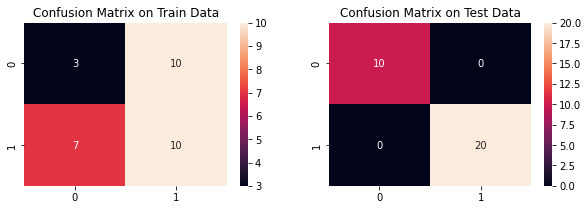

In [71]:
# Plotting the confusion matrix using the sns heatmap for train and test data for the last result
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.title('Confusion Matrix on Train Data')
confusionTrain=createConfusionMatrix(Y_train_predicted,Y_test)
sns.heatmap(confusionTrain,annot=True)

plt.subplot(1,2,2)
plt.title('Confusion Matrix on Test Data')
confusionTrain=createConfusionMatrix(Y_test_predicted,Y_test)
sns.heatmap(confusionTrain,annot=True)

#### Checking the behavious for random sampling to compare the results

In [72]:

# Creating a dataframe to store the results from each iterations
propDF=pd.DataFrame()
iteration=[]
mainProp=[]
testProp=[]
trainProp=[]
trainLoss=[]
testLoss=[]
trainScore=[]
testScore=[]

for i in range(10):
    # Creating an index to shuffle data and shuffling data using it
    iteration.append(i)
    
    indexList=[i for i in range(0,inputData.shape[0])]
    inputDistribution=(len(target[target==0])/len(target[target==1]))
    trainDistribution=0
    testDistribution=0

    np.random.shuffle(indexList) # Shuffling the index. Used for splitting train and test data
    splitLength=int(len(inputData)*0.8) # Finding the position to split
    trainIndex=indexList[0:splitLength]  #Splitting the train data randomly:Creating the indices
    testIndex=indexList[splitLength:] #Splitting the test data randomly; Creating the indices

    #Splitting the data
    X_train=inputData[trainIndex]
    Y_train=target[trainIndex]
    X_test=inputData[testIndex]
    Y_test=target[testIndex]

    # Find distributions and append it to list
    mainProp.append(len(target[target==0])/len(target[target==1]))
    trainProp.append(len(Y_train[Y_train==0])/len(Y_train[Y_train==1]))
    testProp.append(len(Y_test[Y_test==0])/len(Y_test[Y_test==1]))


    lr=LogisticRegression()

    # Applying Logistic Regression on the unbalanced Dataset
    lr.fit(X_train,Y_train)
    Y_train_predicted=lr.predict(X_train)
    Y_test_predicted=lr.predict(X_test)

    # Append losses of the function to list
    trainLoss.append(symmetricLossFunction(Y_train_predicted,Y_train))
    testLoss.append(symmetricLossFunction(Y_test_predicted,Y_test))
    trainScore.append(lr.score(X_train,Y_train))
    testScore.append(lr.score(X_test,Y_test))
    
# Add the calculated data from iterations to the datasets
propDF['Iteration']=iteration
propDF['Main Data Proportion']=mainProp
propDF['Test Data Proportion']=testProp
propDF['Train Data Proportion']=trainProp
propDF['Train Data Loss']=trainLoss
propDF['Test Data Loss']=testLoss
propDF['Train Score']=trainScore
propDF['Test Score']=testScore
                     
propDF

,Iteration,Main Data Proportion,Test Data Proportion,Train Data Proportion,Train Data Loss,Test Data Loss,Train Score,Test Score
0,0,2.0,0.875000,2.529412,5,0,0.958333,1.000000
1,1,2.0,1.500000,2.157895,3,1,0.975000,0.966667
2,2,2.0,1.307692,2.243243,3,2,0.975000,0.933333
3,3,2.0,2.333333,1.926829,3,1,0.975000,0.966667
4,4,2.0,2.750000,1.857143,3,0,0.975000,1.000000
5,5,2.0,1.727273,2.076923,3,1,0.975000,0.966667
6,6,2.0,2.000000,2.000000,3,1,0.975000,0.966667
7,7,2.0,1.500000,2.157895,3,0,0.975000,1.000000
8,8,2.0,2.000000,2.000000,4,0,0.966667,1.000000
9,9,2.0,2.750000,1.857143,3,0,0.975000,1.000000


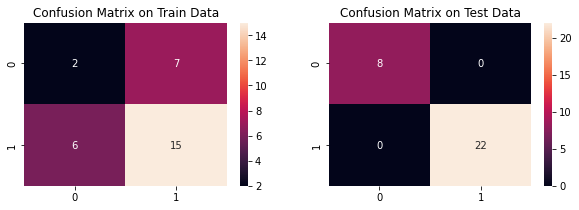

In [73]:
# Plotting the confusion matrix using the sns heatmap for train and test data for the last result
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.title('Confusion Matrix on Train Data')
confusionTrain=createConfusionMatrix(Y_train_predicted,Y_test)
sns.heatmap(confusionTrain,annot=True)

plt.subplot(1,2,2)
plt.title('Confusion Matrix on Test Data')
confusionTrain=createConfusionMatrix(Y_test_predicted,Y_test)
sns.heatmap(confusionTrain,annot=True)

#### It can be seen that the variance of loss is almost the same in both the cases. It can be because the size of the dataset is less. 

#### But it can be clearly seen that the proportion of data is maintained while using stratified sampling, which makes the train and test dataset a closer approximation of the population data

### Using Stratified sampling based on a continous column

In [74]:
bins=np.linspace(min(petalWidth)-1,max(petalWidth)+1,5)
binned=np.digitize(petalWidth,bins)
from sklearn.model_selection import train_test_split

# Creating a dataframe to store the results from each iterations
dispropDF=pd.DataFrame()
iteration=[]
mainProp=[]
testProp=[]
trainProp=[]
trainLoss=[]
testLoss=[]
trainScore=[]
testScore=[]

for i in range(10): # Do the iteration of sampling and training 10 times
    iteration.append(i)
    
    # Create the disproportionate stratified sampling using the train, test splot methos with 20% test size
    
    X_train,X_test,Y_train,Y_test=train_test_split(inputData,target,stratify=binned,test_size=0.2)

    # Find distributions and append it to list
    mainProp.append(len(target[target==0])/len(target[target==1]))
    trainProp.append(len(Y_train[Y_train==0])/len(Y_train[Y_train==1]))
    testProp.append(len(Y_test[Y_test==0])/len(Y_test[Y_test==1]))
    
    
    lr=LogisticRegression()

    # Applying Logistic Regression on the unbalanced Dataset
    lr.fit(X_train,Y_train)
    Y_train_predicted=lr.predict(X_train)
    Y_test_predicted=lr.predict(X_test)

    # Append losses of the function to list
    trainLoss.append(symmetricLossFunction(Y_train_predicted,Y_train))
    testLoss.append(symmetricLossFunction(Y_test_predicted,Y_test))
    trainScore.append(lr.score(X_train,Y_train))
    testScore.append(lr.score(X_test,Y_test))
    
# Add the calculated data from iterations to the datasets
dispropDF['Iteration']=iteration
dispropDF['Main Data Proportion']=mainProp
dispropDF['Test Data Proportion']=testProp
dispropDF['Train Data Proportion']=trainProp
dispropDF['Train Data Loss']=trainLoss
dispropDF['Test Data Loss']=testLoss
dispropDF['Train Score']=trainScore
dispropDF['Test Score']=testScore
                     
dispropDF

,Iteration,Main Data Proportion,Test Data Proportion,Train Data Proportion,Train Data Loss,Test Data Loss,Train Score,Test Score
0,0,2.0,2.750000,1.857143,3,1,0.975000,0.966667
1,1,2.0,1.142857,2.333333,4,1,0.966667,0.966667
2,2,2.0,2.750000,1.857143,4,0,0.966667,1.000000
3,3,2.0,1.727273,2.076923,2,1,0.983333,0.966667
4,4,2.0,2.000000,2.000000,2,2,0.983333,0.933333
5,5,2.0,2.000000,2.000000,3,1,0.975000,0.966667
6,6,2.0,2.000000,2.000000,4,0,0.966667,1.000000
7,7,2.0,2.333333,1.926829,3,1,0.975000,0.966667
8,8,2.0,4.000000,1.727273,4,1,0.966667,0.966667
9,9,2.0,1.500000,2.157895,4,0,0.966667,1.000000


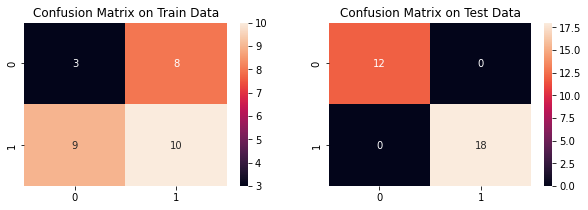

In [75]:
# Plotting the confusion matrix using the sns heatmap for train and test data for the last result
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.title('Confusion Matrix on Train Data')
confusionTrain=createConfusionMatrix(Y_train_predicted,Y_test)
sns.heatmap(confusionTrain,annot=True)

plt.subplot(1,2,2)
plt.title('Confusion Matrix on Test Data')
confusionTrain=createConfusionMatrix(Y_test_predicted,Y_test)
sns.heatmap(confusionTrain,annot=True)

## 6. Re-assess the performance. Comment on any changes from the random sampling case. If there is no significant change, comment on why or why not?

#### In the last Stratified sampling, where the Stratification variable was selected as Petal Length, it can be seen that the pair of train and test scores are repeating a lot. The same pair is seen more than one times, and there seems to be a better estimation in estimation of the score.

#### In the first method, the proportion of the samples in train and test dataset was same as that in the original dataset, but the pairs of train and test scores seems to be random in most of the cases. 


#### The same case is observed for random sampling as well

#### It would be a better idea to do stratified sampling on any of the input variables as they seem to be leading to more stable scores of the machines performance. 